
--- Summary ---
Total session folders found: 41
Session files with valid ratings processed: 41
Session files excluded by suffix: 0
Session files without rating (null, missing key, or feedback object): 0
Session files with invalid rating format (non-integer): 0
Session files with other errors (JSON, missing session_id, etc.): 0

Unique integer 'rating' values found in data: [3, 4, 5]


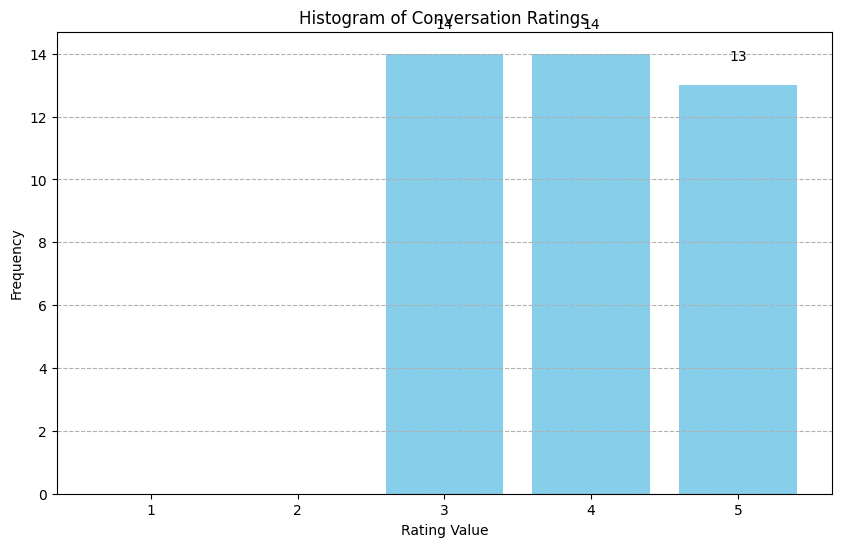


Histogram has been generated and displayed.


In [18]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter

def analyze_conversation_ratings():
    base_data_folder = "../data_output"
    # Using the comprehensive exclusion list previously discussed
    exclude_suffixes = []
    
    ratings = []
    valid_session_files_count = 0
    excluded_session_files_count = 0
    files_without_rating_count = 0 # Includes null ratings or missing feedback/rating key
    files_with_invalid_rating_format_count = 0
    files_with_errors_count = 0 # JSON errors, missing session_id, etc.

    try:
        session_folders = [
            f for f in os.listdir(base_data_folder) 
            if os.path.isdir(os.path.join(base_data_folder, f))
        ]
    except FileNotFoundError:
        print(f"Error: The directory '{base_data_folder}' was not found.")
        return
    except Exception as e:
        print(f"Error listing directories in '{base_data_folder}': {e}")
        return

    if not session_folders:
        print(f"No session folders found in '{base_data_folder}'.")
        return

    for session_folder in session_folders:
        conversation_file_path = os.path.join(base_data_folder, session_folder, "conversation.json")

        if os.path.exists(conversation_file_path):
            try:
                with open(conversation_file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                
                session_id = data.get("session_id")
                
                if not session_id:
                    print(f"Warning: 'session_id' not found in {conversation_file_path}. Skipping.")
                    files_with_errors_count +=1
                    continue

                excluded = False
                for suffix in exclude_suffixes:
                    if session_id.endswith(suffix):
                        excluded = True
                        excluded_session_files_count += 1
                        break
                
                if not excluded:
                    feedback = data.get("feedback")
                    if feedback and "rating" in feedback:
                        rating_val = feedback.get("rating")
                        if rating_val is not None:
                            try:
                                rating_int = int(rating_val) # Convert to integer
                                ratings.append(rating_int)
                                valid_session_files_count += 1
                            except ValueError:
                                # print(f"Warning: Rating value '{rating_val}' in {conversation_file_path} is not a valid integer. Skipping this rating.")
                                files_with_invalid_rating_format_count += 1
                        else:
                            files_without_rating_count += 1 # Rating is explicitly null
                    else:
                        files_without_rating_count += 1 # Feedback object or rating key missing
            except json.JSONDecodeError:
                print(f"Error: Could not decode JSON from {conversation_file_path}.")
                files_with_errors_count += 1
            except Exception as e:
                print(f"Error processing file {conversation_file_path}: {e}")
                files_with_errors_count += 1
        else:
            # This case should ideally not happen if session_folders are correctly identified
            # print(f"Warning: conversation.json not found in {os.path.join(base_data_folder, session_folder)}")
            pass

    print(f"\n--- Summary ---")
    print(f"Total session folders found: {len(session_folders)}")
    print(f"Session files with valid ratings processed: {valid_session_files_count}")
    print(f"Session files excluded by suffix: {excluded_session_files_count}")
    print(f"Session files without rating (null, missing key, or feedback object): {files_without_rating_count}")
    print(f"Session files with invalid rating format (non-integer): {files_with_invalid_rating_format_count}")
    print(f"Session files with other errors (JSON, missing session_id, etc.): {files_with_errors_count}")

    if not ratings:
        print("\nNo valid integer ratings found to plot.")
        return

    # Print unique rating values actually found in the data
    unique_ratings_found = sorted(list(set(ratings)))
    print(f"\nUnique integer 'rating' values found in data: {unique_ratings_found}")

    # Plotting the histogram
    rating_counts = Counter(ratings)
    
    # Define the full desired range for the x-axis (e.g., 1 to 5)
    expected_xaxis_labels = [1, 2, 3, 4, 5] 
    
    counts_for_plot = [rating_counts.get(r, 0) for r in expected_xaxis_labels]

    plt.figure(figsize=(10, 6))
    plt.bar([str(r) for r in expected_xaxis_labels], counts_for_plot, color='skyblue') 
    plt.title('Histogram of Conversation Ratings')
    plt.xlabel('Rating Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')
    
    max_h = max(counts_for_plot) if counts_for_plot else 0
    text_offset = 0.05 * max_h if max_h > 0 else 0.1

    for i, count in enumerate(counts_for_plot):
        if count > 0: # Only add text for non-zero bars
            plt.text(i, count + text_offset, str(count), ha='center', va='bottom')

    plt.show()
    print("\nHistogram has been generated and displayed.")

if __name__ == '__main__':
    analyze_conversation_ratings()